<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Programació Dinàmica</h2>
</center>
</div>

In [36]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### TOP-DOWN = recursiu (guardant resultats anteriors) 
/// 
### BOTTOM-UP = iteratiu començant desde baix

# Programació dinàmica vs Recursió

Quan tenim un algorisme recursiu que crida múltiples vegades el mateix subproblema, cal veure si hi ha la possibilitat de convertir-ho en un algorisme de programació dinàmica. El cas de <b>Fibonacci</b> és un clar exemple ja que per a calcular el fibonacci d'un número en concret cal haver calculat el fibonnaci dels seus dos números anteriors.

Al fer-ho recursivament estarem generant el següent arbre de crides:

<img src="img/fibonacci.png">

Com podeu observar, moltes de les crides que fem ens les podem estalviar doncs amb calcular un sol cop el fibonacci de cada nombre en tenim suficient. La programació dinàmica ens ajuda en aquest cas.

# Problema 1.1: Fibonacci recursiu

Implementeu la funció <b>fib_rec</b>. Donat un nombre enter positiu o zero, $n$, ha de retornar el nombre de fibonacci, $F(n)$ que li correspon. <br>
Per exemple: <br>
        $$F(0)=0, \quad F(1)=1, \quad F(2)=1, \quad F(3)=2, \quad F(4)=3, \quad F(5)=5$$

Quina és la complexitat de l'algorisme? (Observeu l'arbre de la imatge anterior)

In [2]:
def fib_rec(n):
    """
    Calcula el nombre amb índex 'n' de la seqüència de Fibonacci.
    
    Params
    ======
    :n: El nombre de fibonacci que volem calcular.
    
    Returns
    =======
    :F(n): El nombre de la seqüència corresponent.
    """
    if n == 0:
        return 0
    if n == 1:
        return 1
        
    return fib_rec(n-1)+fib_rec(n-2)
    

In [3]:
print([fib_rec(n) for n in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


##### COMPLEXITAT DE FIBONACCI RECURSIU

Si definim <b>T(n)</b> como el número total d'operacions (llamades recursives) necesaries para calcular fib_rec(n).
    <b>T(n)=T(n−1)+T(n−2)+1</b> (+1 es lo cost constant asociat a la suma).

Per tant la solució de recurrencia creix exponencial perque cad cop es criden dos noves funcions i per tant: 
        
<b>O(2^n)</b>

# Problema 1.2: Fibonacci amb programació dinàmica (Top-Down)

Implementeu la funció <b>fib_top_down</b>. Seguiu una estratègia de programació dinàmica utilitzant el mateix esquema que fibonacci recursiu però on aneu emmagatzemant els càlculs realitzats prèviament.

In [4]:
def fib_top_down(n, dp=None):
    
    # Inicialització
    if dp is None:
        dp = [0]*(n+1)
    
    if n == 0:
        return 0
    if n == 1:
        return 1
        
    if dp[n] != 0:
        return dp[n]
    
    dp[n] = fib_top_down(n-1, dp)+ fib_top_down(n-2, dp)
        
    return dp[n]

In [5]:
print([fib_top_down(n) for n in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


# Problema 1.2: Fibonacci amb programació dinàmica (Bottom-Up)

Implementeu la funció <b>fib_bottom_up</b>. Seguiu una estratègia de programació dinàmica on aneu emmagatzemant càlculs realitzats prèviament.<br><br> 
<b>Quina és la complexitat de l'algorisme?</b>

In [6]:
def fib_bottom_up(n):
    
    dp = [0,1] + [0]*(n-1)
    
    for i in range(2, n+1):
        dp[i] = dp[i-1]+dp[i-2]
    
    if n == 0:
        return dp[0]
    
    return dp[-1]

In [7]:
print([fib_bottom_up(n) for n in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


##### COMPLEXITAT FIBONACCIO PROGRAMACIO DINAMICA

Clarament te un cost de <b>O(n)</b>

Primer que tot es crea una llista de tamany per guardar tots valors fins el de la posició n de la successió

Seguidament es recorre tota la llista assignant a la posicio actual la suma dels dos anteriors de la llista (te cost 1 la suma i l'assignacio del valor)

# Problema 2: Rod Cutting

Volem tallar una barra de N segments de longitud en trossos per maximitzar-ne el seu valor de venta. Cada segment tallat té un preu associat en funció de la seva longitud.<br>

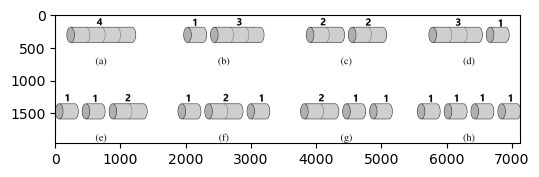

In [8]:
from matplotlib import pyplot as plt
im = plt.imread('img/07-rodcutting-example-2.jpg')
fig, ax = plt.subplots(figsize=(6, 3))
ax.imshow(im)
plt.show()

Per exemple, donada una barra de 5 peces de longitud i la taula de preus següent: <br><br>
     Long: 1 2 3 4 5<br>
     Preu: 1 5 5 6 7<br><br>
 Podem decidir:
   - no tallar la barra, long=5 i per tant preu=7.
   - Tallar-la en dos trossos de 1 i 4 i per tant preu=1+6=7
   - Tallar-la en cinc trossos de 1 i per tant preu=5
   ...

In [9]:
def rod_cutting_rec(N, prices):
    """
    Algorisme recursiu.
    
    Params
    ======
    :N: Un enter amb el nombre de segments de la barra
    :prices: Una llista amb els preus de cada longitud de segment.
    
    Returns
    =======
    :best: El millor preu de venta de les peces
    """
    
    best = 0
    
    preus = {}
    for i in range(1, N+1):
        preus[i] = prices[i-1]
    
    if N == 0:
        return 0
    if N == 1:
        return preus[1]
    
    for i in range(0, N):
        best = max(best, rod_cutting_rec(i, prices)+preus[N-i])
    # best = max([rod_cutting_rec(i,prices)+preus[N-i] for i in range(N)])
    
    return best

In [10]:
rod_cutting_rec(5, [1,5,5,6,7]) # Retorna 11

11

In [11]:
def rod_cutting_dp_bottom_up(N, prices):    
    best = 0
    
    preus = {}
    for i in range(1, N+1):
        preus[i] = prices[i-1]
    
    dp = [0,preus[1]] + [0]*(N-1)
    
    if N == 0 or N == 1:
        return dp[N]
    
    for i in range(1, N+1):
        dp[i] = max([dp[j]+preus[i-j] for j in range(i)])
    
    return max(dp)

In [12]:
rod_cutting_dp_bottom_up(5,[1,5,5,6,7]) # Retorna 11

11

In [14]:
def rod_cutting_dp_top_down(N, prices, dp=None):    
    best = 0
    
    # EL TEU CODI AQUÍ
    preus = {}
    for i in range(1, N+1):
        preus[i] = prices[i-1]
    
    dp = [0,preus[1]] + [0]*(N-1)
    
    if N == 0:
        dp[0] = 0
    if N == 1:
        dp[1] = preus[1]
    
    for i in range(0, N):
        dp[i] = max(dp[i], rod_cutting_rec(i, prices)+preus[N-i])
    
    # dp[i] = max([rod_cutting_rec(i,prices)+preus[N-i] for i in range(N)])
    
    return max(dp)

In [15]:
rod_cutting_dp_top_down(5, [1,5,5,6,7]) # Retorna 11

11

# Problema 3: Subseqüència Incremental més Llarga (Longest Increasing Subsequence, LIS)
Donada una seqüència de números, per exemple: $10, 22, 9, 33, 21, 50, 41, 60, 80$, volem trobar la subsequència d'elements més llarga possible que satisfaci que els seus elements estiguin ordenats de petit a gran.<br>
En el cas de l'exemple donat, la subseqüència més llarga té 6 elements: $10, 22, 33, 50, 60, 80$. Observeu però, que no és única.

# Problema 3.1: LIS Recursiva
<b>Quina complexitat té aquest algorisme?</b></p>

In [19]:
def lis_ends_here(seq, n):
    """
    Aquesta funció ens retorna la longitud de la seqüència més llarga que acaba a la posició 'n'.
    
    Params
    ======
    :seq: Llista d'elements
    :n: Índex de la llista
    
    Returns
    =======
    :val: Longitud de la LIS suposant que finalitza a 'n'.
    """
    if n == 1:
        return 1
    
    maxim = 1
    for i in range(1,n):
        result = lis_ends_here(seq, i)
        
        if seq[i-1] < seq[n-1] and result + 1 > maxim:
            maxim = result + 1
    
    return max(maxim, lis_ends_here(seq, n - 1))


def lis_rec(seq):
    """
    Solució recursiva al problema LIS.
    
    Params
    ======
    :seq: Seqüència inicial.
    
    Returns
    =======
    :val: Longitud de LIS.
    """
          
    return lis_ends_here(seq, len(seq))

In [20]:
print(lis_rec([1,2,0,9,3,5,4,6,8]))  # Retorna 6
print(lis_rec([4,1,2,1]))            # Retorna 2

6
2


##### COMPLEXITAT LIS RECURSIU:
En l'anterior codi si anomenem igual que abans <b>T(n)</b> la relació de recurrencia en complexitat de temps per la variable n.<br>
Obtenim que T(n) = T(n-1) + T(n-2) + ... + T(1)<br>
per tant si aixo ho anem desenvolupant per cada T(n-i) acabem trobant la complexitat total de:<br>
<b>O(2^n)</b>

T(n) = 2(T(n-1)+T(n-2)+...) = 4(T(n-2)+T(n-3)+....) = 8(T(n-3)+....) = .... = 2^n(T(1))

# Problema 3.2: LIS amb Programació dinàmica
<b>Quina complexitat té aquest algorisme?</b></p>

In [23]:
def lis_dp_bottom_up(seq):
    total = len(seq)
    
    longituds = [1]*total
    
    for i in range(total-2, -1, -1):
        
        for j in range(i+1,total):
            
            if seq[i] < seq[j] and longituds[j] >= longituds[i]:
                longituds[i] = longituds[j]+1
    
    return max(longituds)

In [24]:
print(lis_dp_bottom_up([1,2,0,9,3,5,4,6,8])) # Retorna 6
print(lis_dp_bottom_up([4,1,2,1]))           # Retorna 2

6
2


##### COMPLEXITAT LIS Programació Dinamica:
En el anterior codi s'anomena total a la n (tamany de la longitud de la seqüencia)<br>
Veiem clarament com es recorre un bucle de tamany n que te anidat un altre de tamany fins variable l'anteriror, es a dir, en total es la suma gaussiana (1+2+3+4+....), es a dir n*(n-1)/2, que acaba sent:<br>
n² iteracions i dins es calcula l'operacio d'assignacio i extraccio del valor de l'estructura optima (llista)

Per tant podem concloure que en programacio dinàmica, LIS, té complexitat:<br>
<b>O(n²)</b>  (al final es recorre la llista per trobar el maxim (O(n)) es negligible al costat del bucle)

# Problema 3: Levensthein
Donades dues paraules $A$ i $B$ volem trobar el cost d'edició entre elles. Les operacions que es permeten són:</p>
- <b>Inserir</b> una lletra en qualsevol posició de la paraula. Per exemple, podem transformar la paraula TACA en la paraula TRACA amb només una operació d'inserció.
- <b>Eliminar</b> una lletra en qualsevol posició de la paraula. Per exemple, podem transformar la paraula TRACA en la paraula TACA amb només una operació d'eliminació.
- <b>Substituir</b> una lletra per una altra. Per exemple, podem transformar la paraula TACA en la paraula TOCA amb només una operació de substitució.

Implementeu un algorisme de programació dinàmica que ens permeti trobar el cost mínim d'edició entre les dues paraules i que també retorni les operacions que s'han de fer per transformar una paraula en l'altre. <br>
Per exemple, l'execució de<br> <b>levensthein('WINE', 'WAITER')</b> ha d'imprimir:

<code>
COST: 3
[0, 1, 2, 3, 4]
[1, 0, 1, 2, 3]
[2, 1, 1, 2, 3]
[3, 2, 1, 2, 3]
[4, 3, 2, 2, 3]
[5, 4, 3, 3, 2]
[6, 5, 4, 4, 3]
MAN: W W  # Ja que estem 'mantenint la lletra W entre les paraules'
SUB: A I  # Ja que estem 'substituint' la lletra A per la I
INS: I    # Ja que estem 'inserint' la lletra I
SUB: T N 
SUB: E E 
INS: R   
          # En el cas d'eliminar, podeu imprimir DEL
</code>

In [26]:
import numpy as np
def levensthein(word_A, word_B, del_cost = 1, ins_cost = 1, sub_cost = 1):    
    """
    Algorisme de levensthein.
    
    Params
    ======
    :word_A, word_B: Les dues paraules a comparar
    :del_cost, ins_cost, sub_cost: Els costos d'eliminar, inserir i substituir, respectivament.
    
    Returns
    =======
    :cost: El cost d'edició entre les paraules
    """
    print(f'TRANSFORMAR {word_A} en {word_B}')
    
    word_A = '0' + word_A
    word_B = '0' + word_B
    
    matriu = [[0]*len(word_B) for i in range(len(word_A))]
                                                 
    #inicialització
    for i in range(len(word_A)):
        matriu[i][0] = i
    for j in range(len(word_B)):
        matriu[0][j] = j
    
    #formem la matriu
    for i in range(1,len(word_A)):
        for j in range(1, len(word_B)):
            if word_A[i] == word_B[j]:
                matriu[i][j] = min(matriu[i-1][j-1], matriu[i-1][j]+1, matriu[i][j-1]+1)
            else:
                matriu[i][j] = min( matriu[i-1][j-1]+1, matriu[i-1][j]+1, matriu[i][j-1]+1)
                
    print(f'COST {matriu[len(word_A)-1][len(word_B)-1]}')
    for fila in matriu:
        print(fila)
    
    print('')
    (i,j) = (0,0)
    while(j<len(word_B)-1 or i<len(word_A)-1):
        
        if(j == len(word_B)-1): # Cas en que estem a la ultima columna (sols podem eliminar lletra)
            i+=1
            print(f'DEL:       {word_A[i]}')
        elif(i == len(word_A)-1): # Cas en que estem a la ultima fila (sols podem afegir lletra)
            j+=1
            print(f'INS: {word_B[j]}')
        else:
            accio = np.argmin( [ matriu[i+1][j+1]-matriu[i][j], matriu[i+1][j]-matriu[i][j], matriu[i][j+1]-matriu[i][j]])

            if(accio == 0):
                i+=1
                j+=1
                if(word_A[i] == word_B[j]):
                    print(f'MAN: {word_A[i]} <-> {word_B[j]}')
                else:
                    print(f'SUB: {word_B[j]} <-- {word_A[i]}')
            if(accio == 1):
                i+=1
                print(f'DEL:       {word_A[i]}')
            if(accio == 2):
                j+=1
                print(f'INS: {word_B[j]}')

In [29]:
levensthein('WINE', 'WAITER')
print('--------')
levensthein('XERTA', 'ATZENETA')

TRANSFORMAR WINE en WAITER
COST 3
[0, 1, 2, 3, 4, 5, 6]
[1, 0, 1, 2, 3, 4, 5]
[2, 1, 1, 1, 2, 3, 4]
[3, 2, 2, 2, 2, 3, 4]
[4, 3, 3, 3, 3, 2, 3]

MAN: W <-> W
SUB: A <-- I
INS: I
SUB: T <-- N
MAN: E <-> E
INS: R
--------
TRANSFORMAR XERTA en ATZENETA
COST 5
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[1, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 2, 2, 3, 3, 4, 5, 6, 7]
[3, 3, 3, 3, 4, 4, 5, 6, 7]
[4, 4, 3, 4, 4, 5, 5, 5, 6]
[5, 4, 4, 4, 5, 5, 6, 6, 5]

SUB: A <-- X
SUB: T <-- E
SUB: Z <-- R
SUB: E <-- T
SUB: N <-- A
INS: E
INS: T
INS: A


# Problema 5: Cent Savings
Volem agrupar un conjunt de preus ordenats en, com a màxim, $d+1$ grups. Cada grup de preus es suma i s'arrodoneix a la desena més propera (0, 10, 20,...). L'objectiu és trobar el mínim preu possible donada una llista i un enter $d$. Per formar els grups es talla la llista per la posició que es vulgui sense canviar-ne l'ordre.
- <b>Exemple1:</b> Donada la llista $[13, 14]$ i $d=1$, el valor òptim és $20$ que consisteix en fer $2$ grups: $10+10$.
- <b>Exemple2:</b> Donada la llista $[12,15,19]$ i $d=2$, el valor òptim és 40 fent 2 grups (i no 3 que seria el màxim possible). $Grup(12)=10 + Grup(15,19)=30$

In [30]:
def myround(val):
    """
    Funció auxiliar per arrodonir correctament segons l'enunciat.
    """
    if val%5==0:
        val = val+1
    return round(val, -1)

def cent_savings_recurs(lst, d, i):
    if i == 0 and d == 0:
        return 0
    if i == 0 or d == 0:
        return float('inf')

    min_cost = float('inf')
    current_sum = 0

    for k in range(i, 0, -1):
        current_sum += lst[k - 1]
        min_cost = min(min_cost, cent_savings_recurs(lst, d - 1, k - 1) + myround(current_sum))
        
    return min_cost

def cent_savings_rec(lst, d):
    """
    Algorisme recursiu.
    
    Params
    ======
    :lst: Una llista de preus 
    :d: El nombre de talls que podem fer (grups-1)
    
    Returns
    =======
    :minimal: El preu més baix assolible
    """
    n = len(lst)

    result = cent_savings_recurs(lst, d, n)
    return result

In [31]:
cent_savings_rec([12,15,19], 2) # Retorna 40

40

In [32]:
def cent_savings_tp(lst, d, i, dp):
    if i == 0 and d == 0:
        return 0
    if i == 0 or d == 0:
        return float('inf')

    if dp[i][d] != -1:
        return dp[i][d]

    min_cost = float('inf')
    current_sum = 0

    for k in range(i, 0, -1):
        current_sum += lst[k - 1]
        min_cost = min(min_cost, cent_savings_tp(lst, d - 1, k - 1, dp) + myround(current_sum))

    dp[i][d] = min_cost
    return min_cost

def cent_savings_dp_top_down(lst, d, memo={}):  
    """
    Algorisme programació dinàmica top down.
    
    Params
    ======
    :lst: Una llista de preus 
    :d: El nombre de talls que podem fer (grups-1)
    :memo: Un diccionari de memòria.
    
    Returns
    =======
    :minimal: El preu més baix assolible
    """
    n = len(lst)
    
    # Inicializamos la matriz de resultados con -1
    dp = [[-1] * (d + 1) for i in range(n + 1)]
    
    result = cent_savings_tp(lst, d, n, dp)
    return result

In [33]:
cent_savings_dp_top_down([12,15,19], 2) # Retorna 40

40

In [34]:
def cent_savings_dp_bottom_up(lst, d):
    n = len(lst)
    
    # INICIALITZEM MATRIU PER GUARDAR RESULTATS ( dp[i][j] preu minim de i objectes en j grups) 
    dp = [[100000] * (d + 1) for i in range(n + 1)]
    
    # Cas Base
    dp[0][0] = 0
    
    # Calcular los resultados intermedios
    for i in range(1, n + 1):
        for j in range(1, d + 1):
            current_sum = 0
            for k in range(i, 0, -1):
                current_sum += lst[k - 1]
                dp[i][j] = min(dp[i][j], dp[k - 1][j - 1] + myround(current_sum))
    
    # El resultado final estará en dp[n][d]
    return dp[n][d]

In [35]:
cent_savings_dp_bottom_up([12,15,19], 2) # Retorna 40

40